# Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

I'll try to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#import libraries for model
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)


## Loading the dataset

In [ ]:
df = pd.read_csv('Loan_Modelling.csv')
data = df.copy()
df.head(5)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
df.tail(5)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

The DataFrame has 14 columns as mentioned in the Data Dictionary. Data in each row corresponds to a customer of the bank and his personal data.

## Data Overview

* Observations
* Sanity checks

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB



*   It seems there are no missing values.
*   There are no string like values.
*   All data is in numbers (float or integer), which is good for our ML model.

In [ ]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

The only field with much "variance" is ID, the others, have not a bigger one.

**Let's check how is the data distributed**

In [ ]:
df.describe(include= 'all').T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

I'm going to transform ZIPCode into category variable.

In [ ]:
df['ZIPCode'] = df['ZIPCode'].astype ('category')
df.describe(include= 'all').T

count  unique      top   freq         mean          std  \
ID                  5000.0     NaN      NaN    NaN  2500.500000  1443.520003   
Age                 5000.0     NaN      NaN    NaN    45.338400    11.463166   
Experience          5000.0     NaN      NaN    NaN    20.104600    11.467954   
Income              5000.0     NaN      NaN    NaN    73.774200    46.033729   
ZIPCode             5000.0   467.0  94720.0  169.0          NaN          NaN   
Family              5000.0     NaN      NaN    NaN     2.396400     1.147663   
CCAvg               5000.0     NaN      NaN    NaN     1.937938     1.747659   
Education           5000.0     NaN      NaN    NaN     1.881000     0.839869   
Mortgage            5000.0     NaN      NaN    NaN    56.498800   101.713802   
Personal_Loan       5000.0     NaN      NaN    NaN     0.096000     0.294621   
Securities_Account  5000.0     NaN      NaN    NaN     0.104400     0.305809   
CD_Account          5000.0     NaN      NaN    NaN     0.060400     0.238250   
Online              5000.0     NaN      NaN    NaN     0.596800     0.490589   
CreditCard          5000.0     NaN      NaN    NaN     0.294000     0.455637   

                     min      25%     50%      75%     max  
ID                   1.0  1250.75  2500.5  3750.25  5000.0  
Age                 23.0    35.00    45.0    55.00    67.0  
Experience          -3.0    10.00    20.0    30.00    43.0  
Income               8.0    39.00    64.0    98.00   224.0  
ZIPCode              NaN      NaN     NaN      NaN     NaN  
Family               1.0     1.00     2.0     3.00     4.0  
CCAvg                0.0     0.70     1.5     2.50    10.0  
Education            1.0     1.00     2.0     3.00     3.0  
Mortgage             0.0     0.00     0.0   101.00   635.0  
Personal_Loan        0.0     0.00     0.0     0.00     1.0  
Securities_Account   0.0     0.00     0.0     0.00     1.0  
CD_Account           0.0     0.00     0.0     0.00     1.0  
Online               0.0     0.00     1.0     1.00     1.0  
CreditCard           0.0     0.00     0.0     1.00     1.0



*   The average age of the customers in the campaign is ≈ 45.
*   The minimum value of experience is -3, which is a strange value.
*   The income is right skewed, being 64 thousand the median and ≈ 74 thousand the average.
*   There are 467 different zip codes, being 94720 the most repeated.
*   The credit card spending average is slightly right skewed, the average is bigger than the median.
*   Also the mortgage debt is right skewed. It seems that most of customers don't have any morgage.
*   Less than 25% of customers have taken a loan or a securitie account or a cd account.
*   Apparently 50% of the customers use online banking.
*   It seems that 25% of the customers have a credit card.




In [ ]:
df['Experience'].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

I'm going to transform the negative values into positive ones, because customers can not have negative experience, so I assume that it was a typing error.

In [ ]:
df['Experience'] = abs(df['Experience'])

## Exploratory Data Analysis.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### **Let's check how the fields vary**

In [ ]:
df.groupby('ID').size().sort_values(ascending=False)

ID
1       1
3331    1
3338    1
3337    1
3336    1
       ..
1667    1
1666    1
1665    1
1664    1
5000    1
Length: 5000, dtype: int64

There's not any repeated customer.

## **Age**

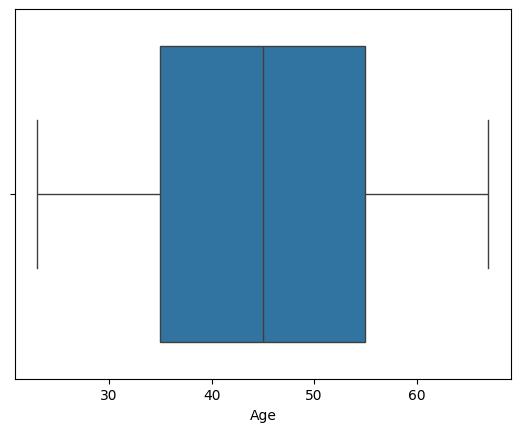

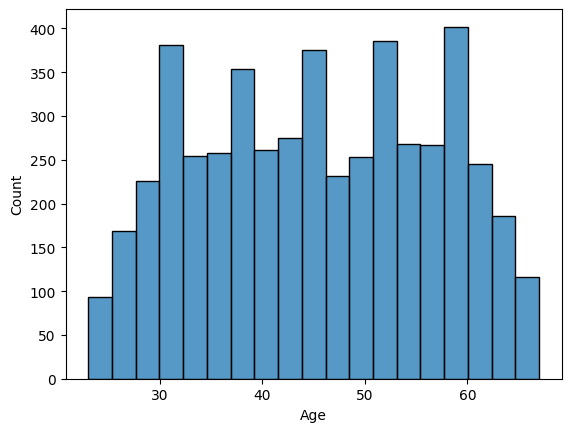

In [ ]:
sns.boxplot(df, x='Age')
plt.show()
sns.histplot(df,x='Age')
plt.show()

Age is normally distributed and has not outliers.




##**Experience**

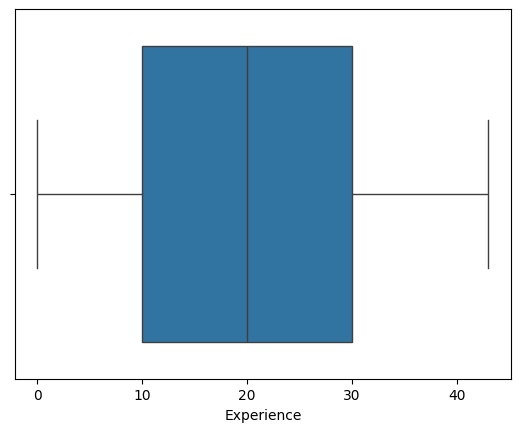

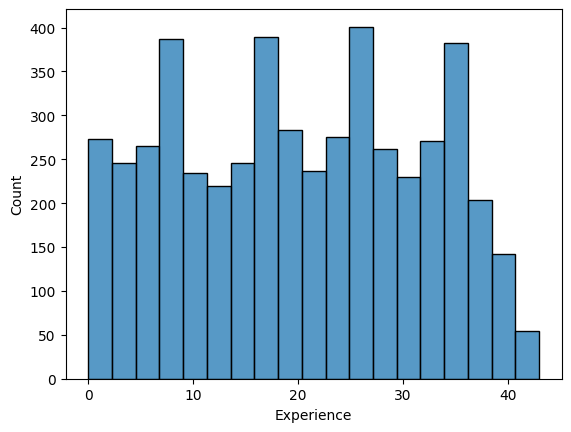

In [ ]:
sns.boxplot(df, x='Experience')
plt.show()
sns.histplot(df,x='Experience')
plt.show()

Experience is also normally distributed and has not outliers.

##**Income**

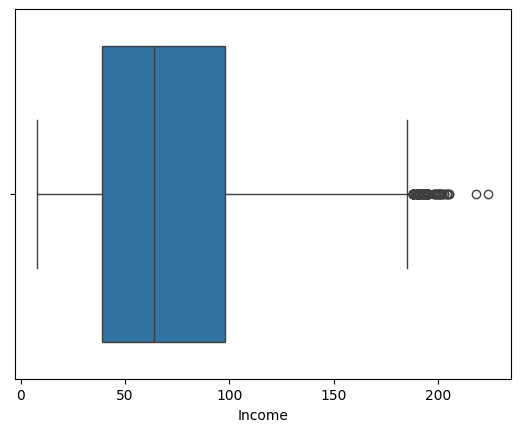

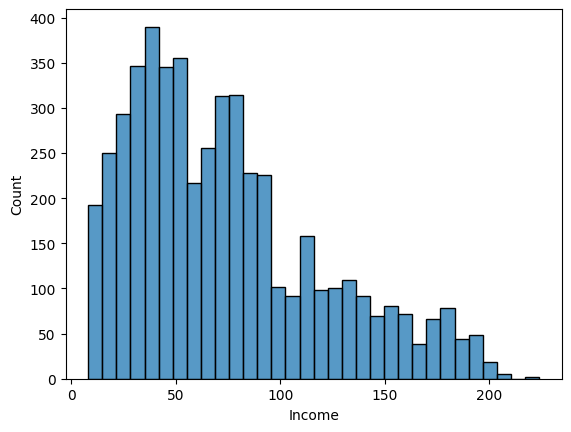

In [ ]:
sns.boxplot(df, x='Income')
plt.show()
sns.histplot(df,x='Income')
plt.show()

In [ ]:
Q1 = np.percentile(df['Income'], 25)
Q3 = np.percentile(df['Income'], 75)
IQR = Q3 - Q1
Upper_Outliers = Q3 + IQR*1,5
print("Upper limit for outliers:", Upper_Outliers[0])

Upper limit for outliers: 157.0


*   Income is right skewed. The median is 64 th and the average is approx. 74 th.
*   Incomes bigger than 157 th, are outliers.



##**ZIP Code**

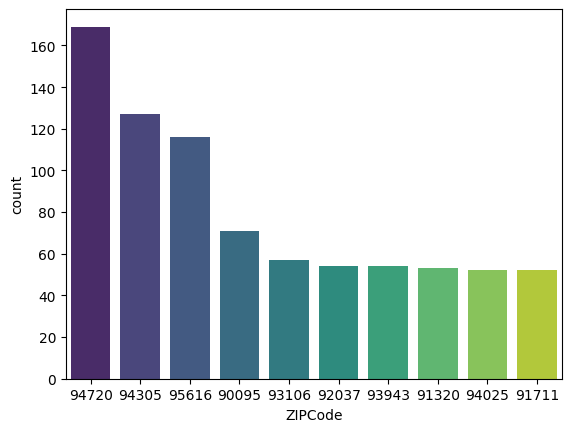

In [ ]:
sns.countplot(df,x='ZIPCode',order = df['ZIPCode'].value_counts().head(10).index,palette='viridis');

In [ ]:
df['ZIPCode'].value_counts().head(10).sum()/len(df['ZIPCode'])

0.161

*   The 94720 zip code is where most customers have their address.
*   The top 10 count of the zip codes focuses 16.1% of the addresses



##**Family**

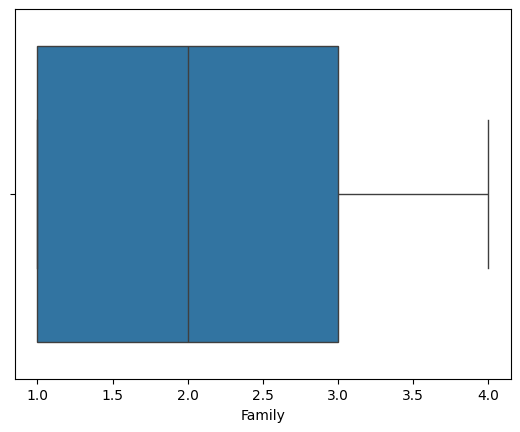

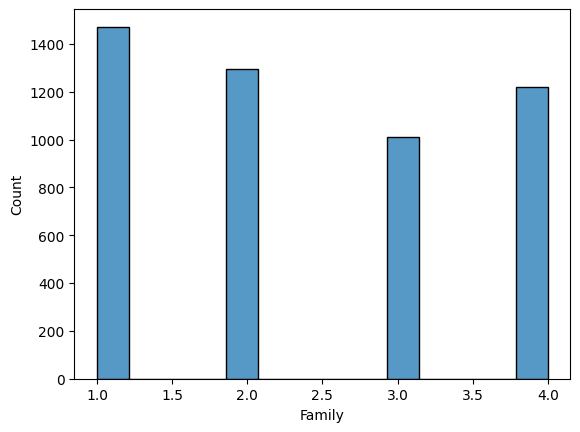

In [ ]:
sns.boxplot(df, x='Family')
plt.show()
sns.histplot(df,x='Family')
plt.show()

*   Most of the customers are singles, followed by couples.
*   It seems that there are not outliers.



##**CC Avg**

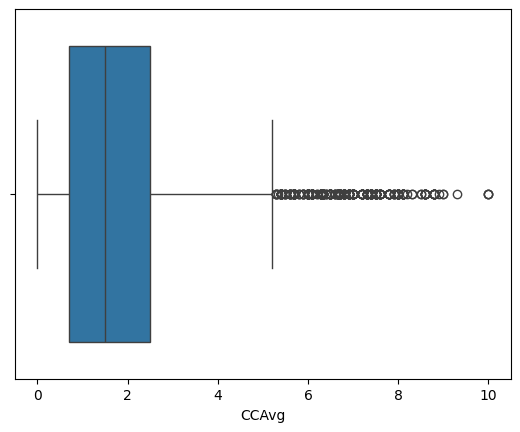

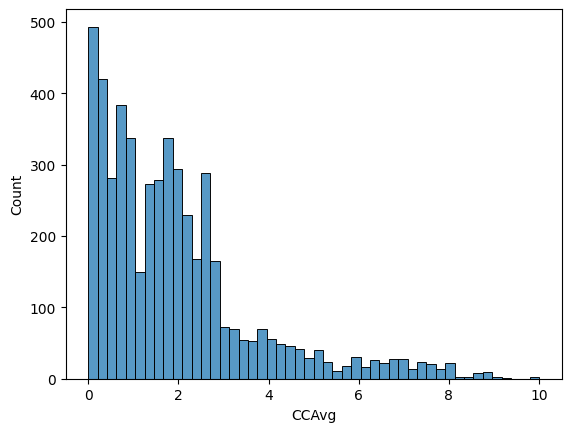

In [ ]:
sns.boxplot(df, x='CCAvg')
plt.show()
sns.histplot(df,x='CCAvg')
plt.show()

In [ ]:
Q1 = np.percentile(df['CCAvg'], 25)
Q3 = np.percentile(df['CCAvg'], 75)
IQR = Q3 - Q1
Upper_Outliers = Q3 + IQR*1,5
print("Upper limit for outliers:", Upper_Outliers[0])

Upper limit for outliers: 4.3


*   CC Avg is right skewed.
*   Values bigger than 4.3 are outliers
*   Values are focused principally between 0 and 2


##**Education**

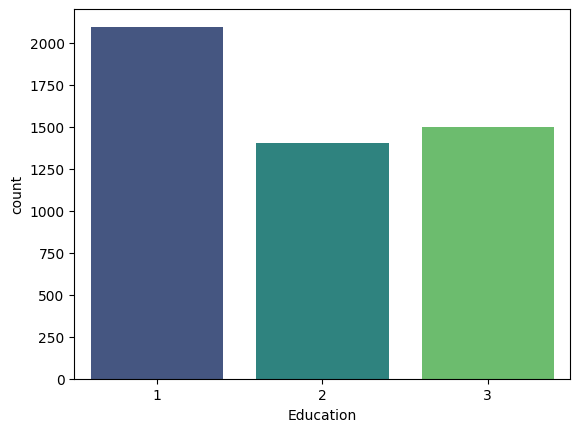

In [ ]:
sns.countplot(df,x='Education', palette = 'viridis')
plt.show()

*   Most of the customers are undergraduate, followed by advanced/professionals.


##**Mortgage**

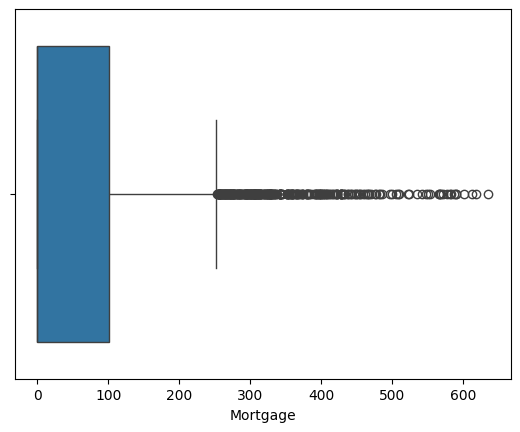

In [ ]:
sns.boxplot(df, x='Mortgage')
plt.show();

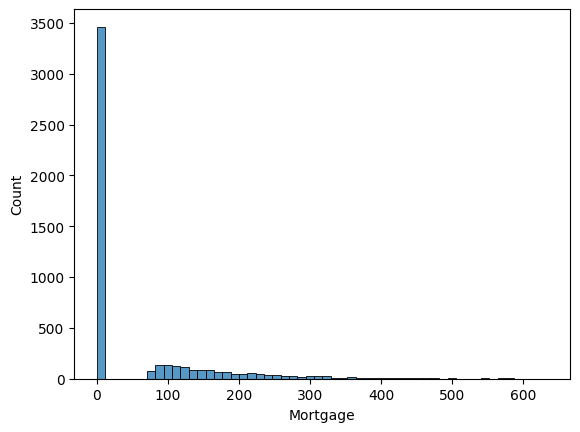

In [ ]:
sns.histplot(df,x='Mortgage', palette = 'viridis')
plt.show();

*   Most of the customers have not a mortgage.


Let's check the one's who have:

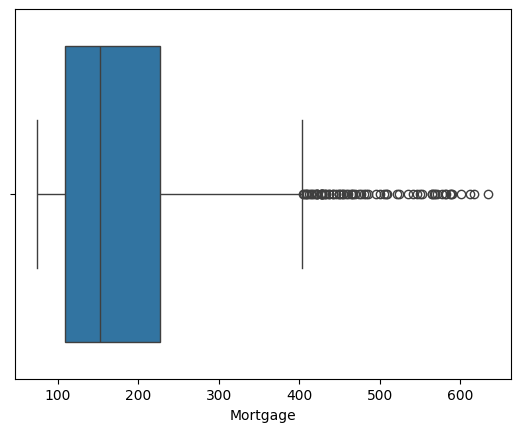

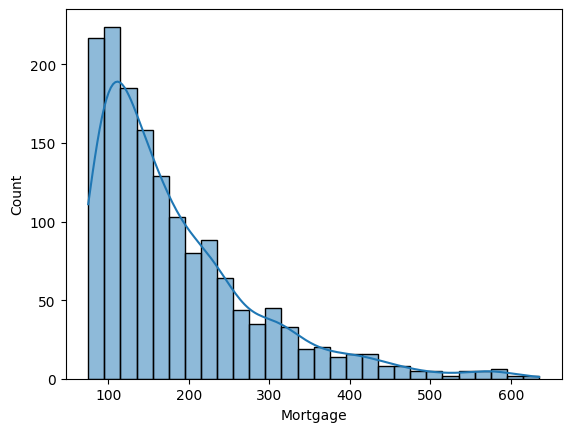

In [ ]:
sns.boxplot(df, x=df['Mortgage'][df['Mortgage'] > 0])
plt.show();
sns.histplot(df,x=df['Mortgage'][df['Mortgage'] > 0],kde= True)
plt.show();

In [ ]:
Q1 = np.percentile(df['Mortgage'][df['Mortgage'] > 0], 25)
Q3 = np.percentile(df['Mortgage'][df['Mortgage'] > 0], 75)
IQR = Q3 - Q1
Upper_Outliers = Q3 + IQR*1,5
print("Upper limit for outliers:", Upper_Outliers[0])

Upper limit for outliers: 345.0


*   On customers with mortgage, distribution is right skewed.
*   Values bigger than 345 are outliers
*   Most of the debts are concentrated between 80 th an 200 th.

##**Personal Loan**

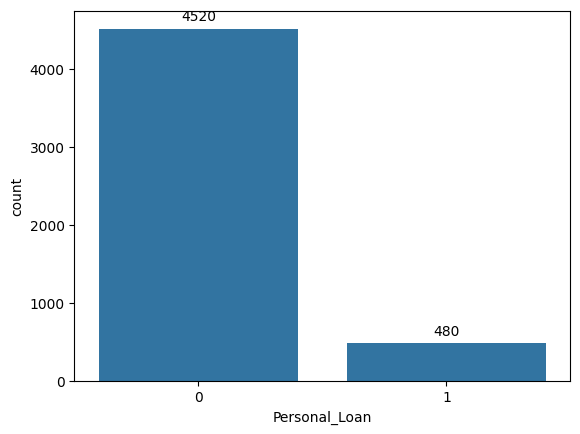

In [ ]:
ax = sns.countplot(data=df, x='Personal_Loan')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.show()

In [ ]:
(df['Personal_Loan']==1).sum()/len(df)*100

9.6

There are 480 customers with personal loan, almost ten percent of the total.

##**Securities Account**

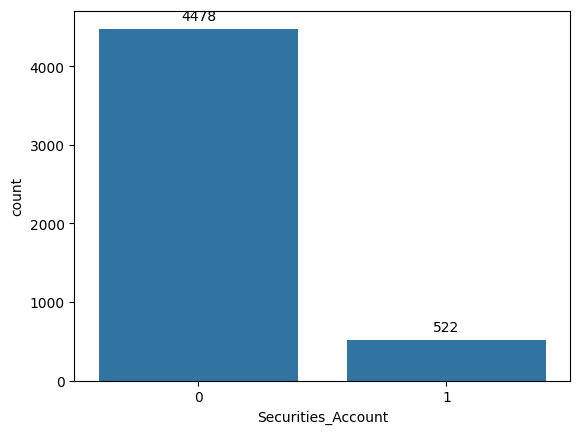

In [ ]:
ax = sns.countplot(data=df, x='Securities_Account')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.show()

In [ ]:
((df['Securities_Account']==1).sum()/len(df)*100).round(2)

10.44

522 customers have securities account


##**CD Account**

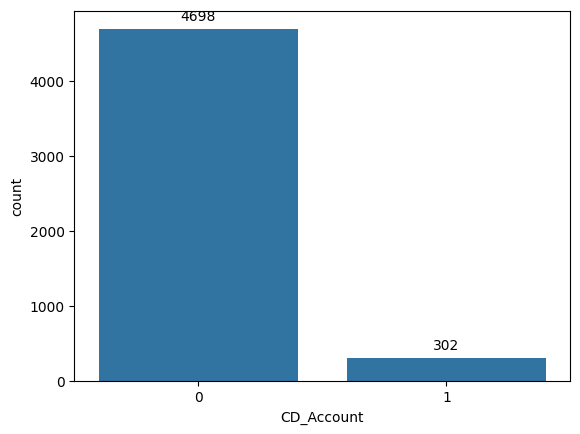

In [ ]:
ax = sns.countplot(data=df, x='CD_Account')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.show()

In [ ]:
((df['CD_Account']==1).sum()/len(df)*100).round(2)

6.04

Only 6% of the customers have certificate deposit account.


##**Online Banking**

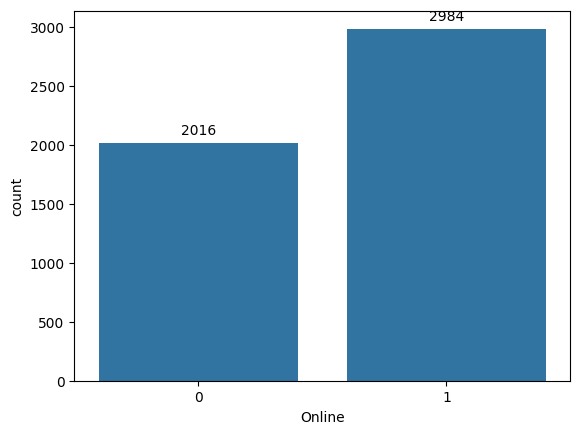

In [ ]:
ax = sns.countplot(data=df, x='Online')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.show()

In [ ]:
((df['Online']==1).sum()/len(df)*100).round(2)

59.68

Almost 60% of the customers uses online banking.

##**Credit Card**

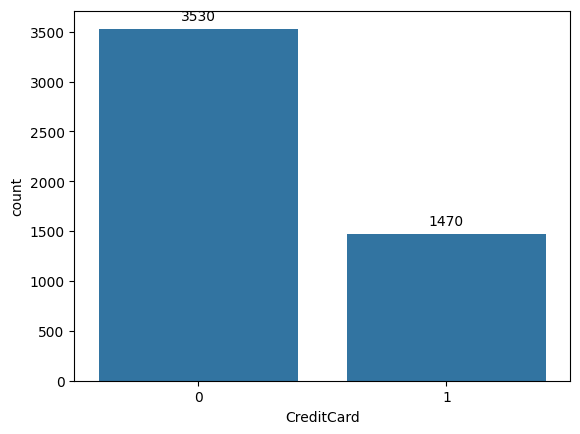

In [ ]:
ax = sns.countplot(data=df, x='CreditCard')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.show()

In [ ]:
((df['CreditCard']==1).sum()/len(df)*100).round(2)

29.4

Almost 30% of the customers have a credit card.

#**Multivariate Analysis**

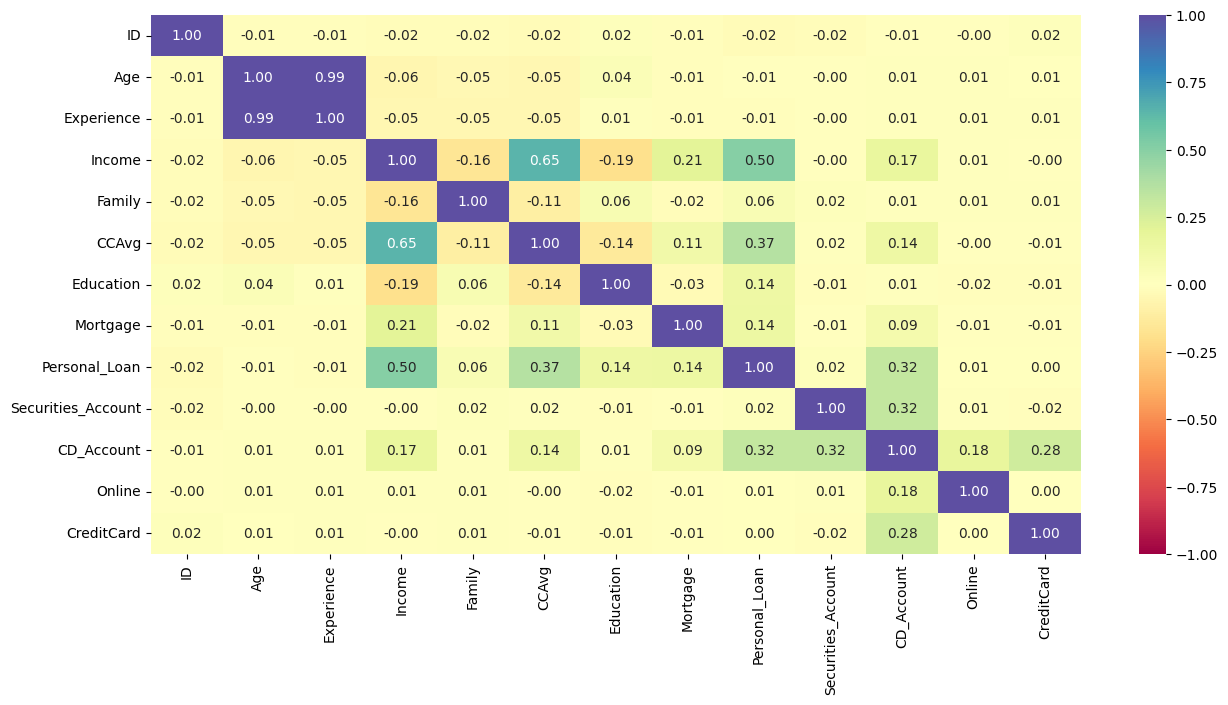

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

####**Principal insights:**

*   Income has a moderate relation with personal loan.
*   Also income has a slightly positive higher correlation with the average spending of the credit card
*   Experience and Age has a relation near to 1, which is highly correlated.
*   The average spending of the credit card has a weak relation with purchased loans.
*   Certificate Deposite also have a weak relation with the personal loans.
*   The rest of the variables have not important correlations between them.


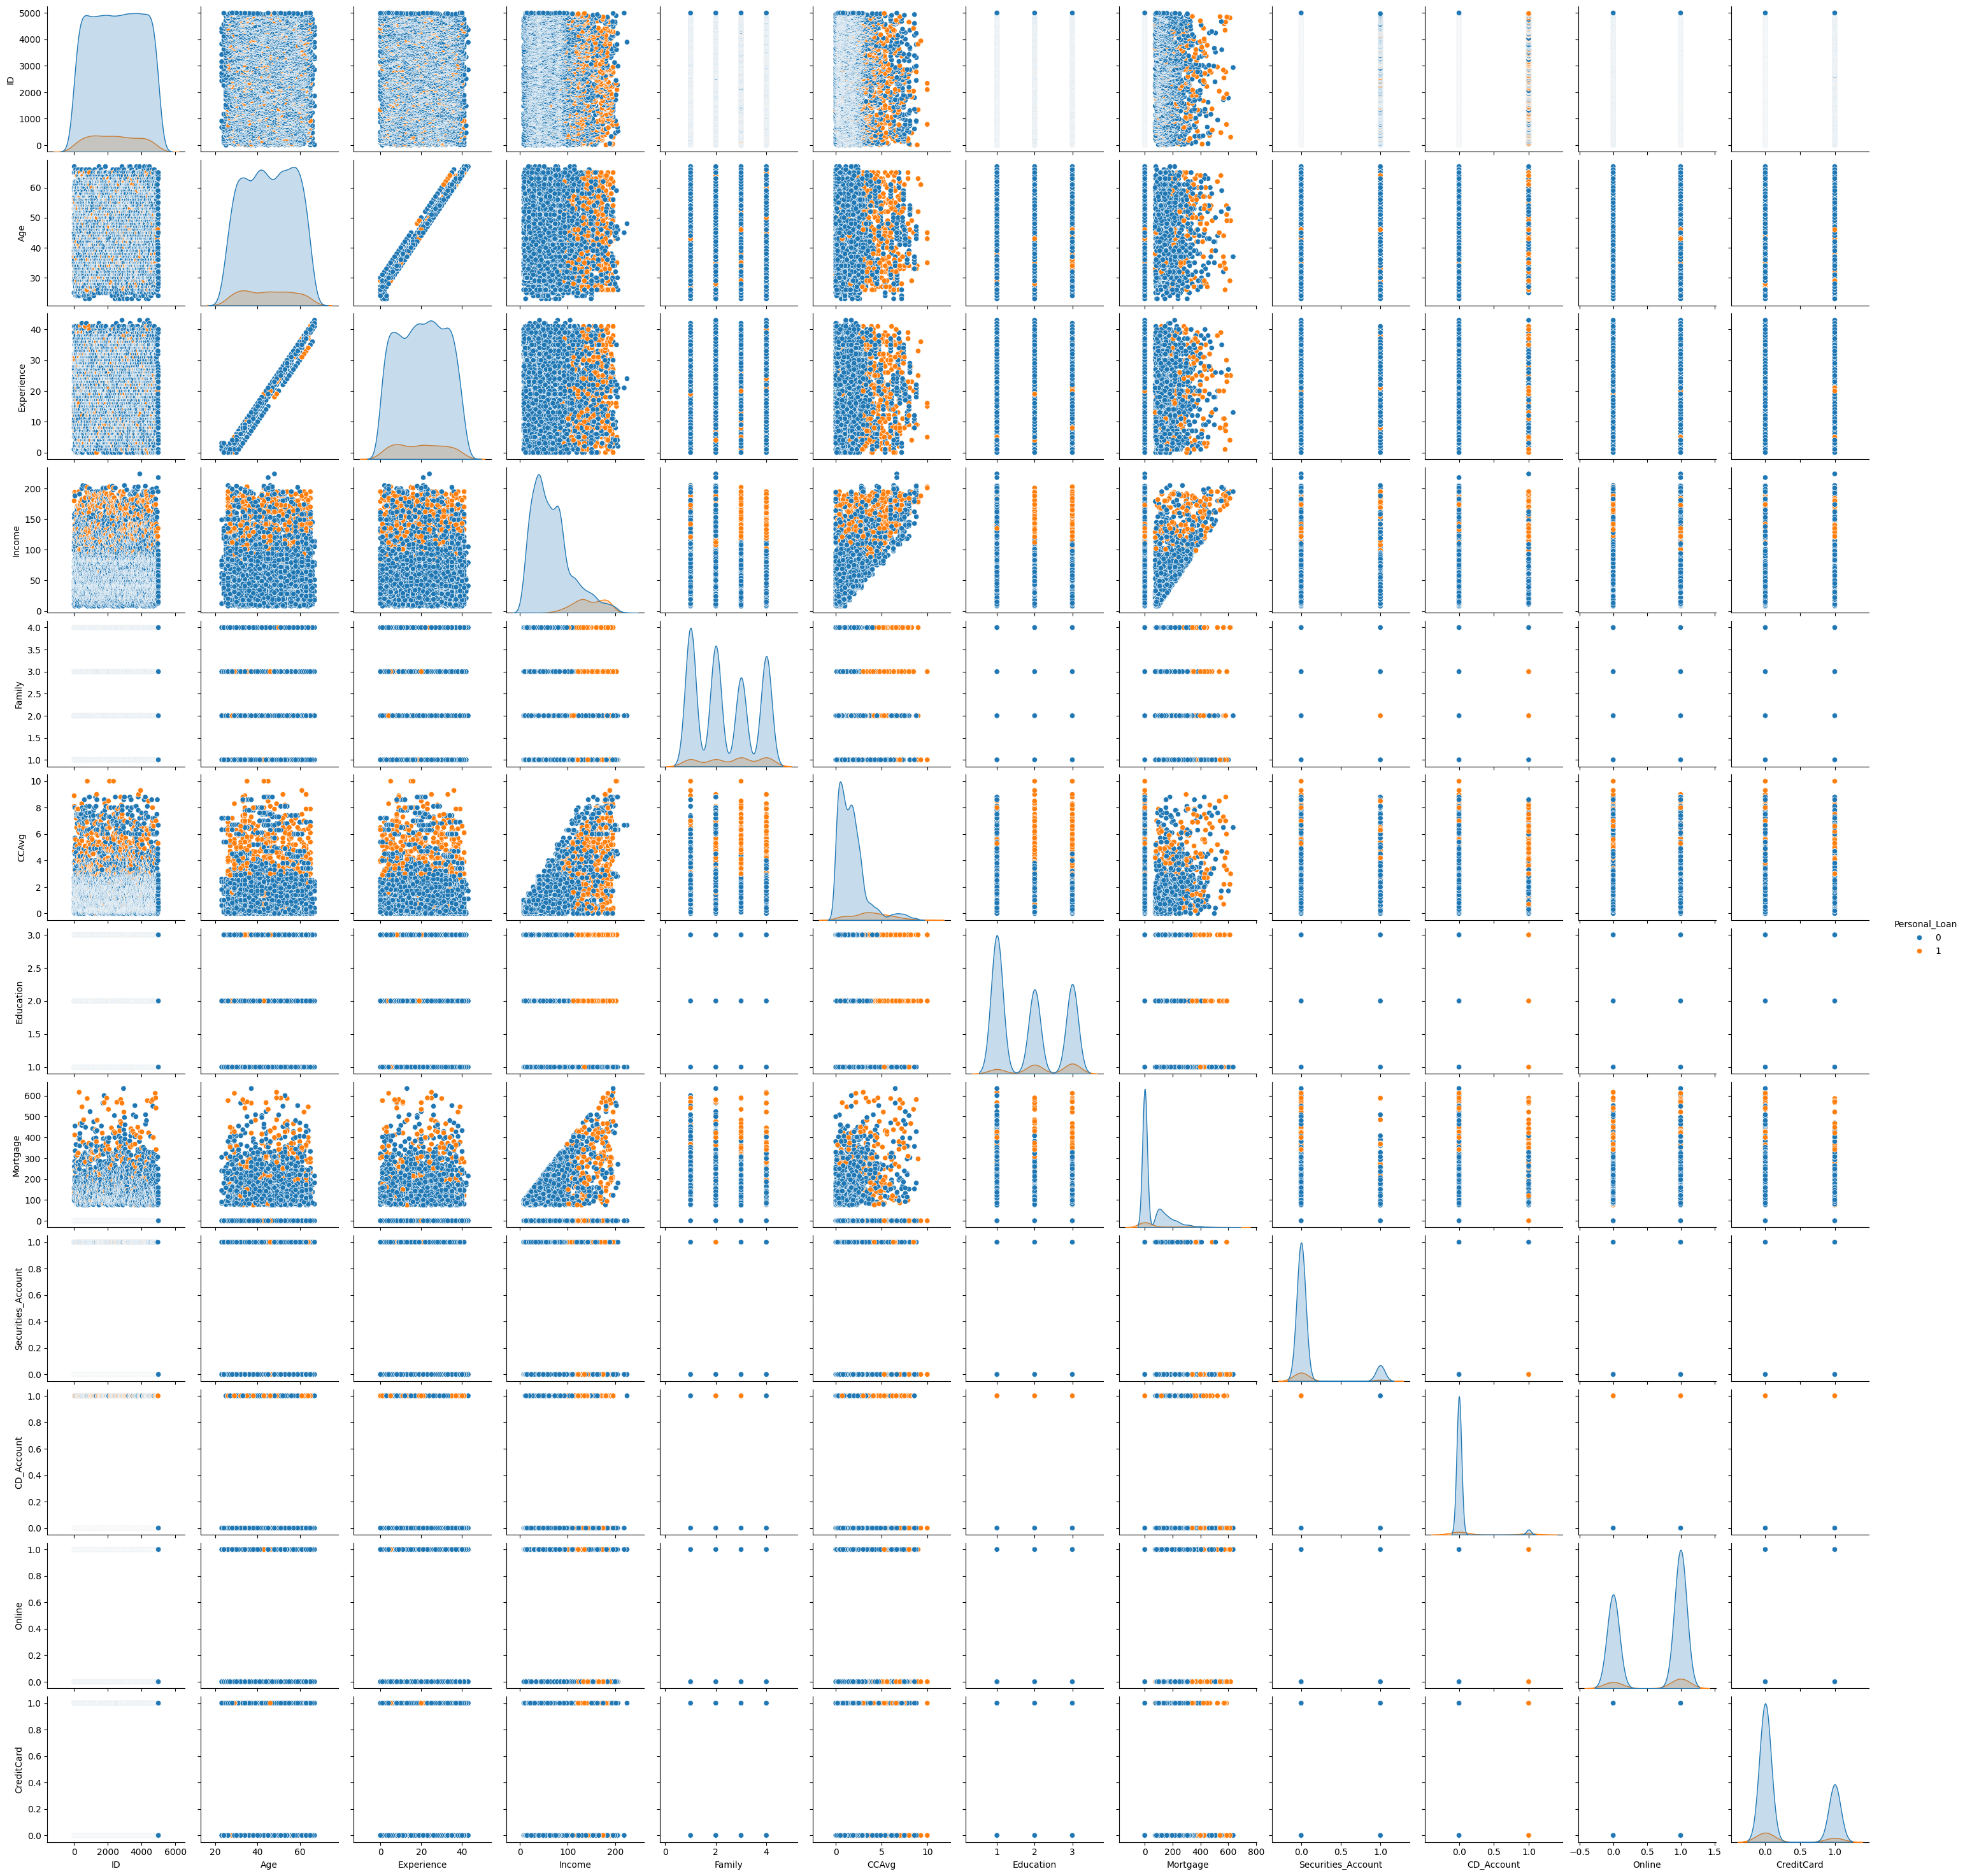

In [ ]:
sns.pairplot(df, hue='Personal_Loan');

*   This graph gives us an bird's eye view.

*   We can see interesting patterns in data, so we are going to double check on the most striking combinations, specially the ones related with out target variable.

##**Relation between income and personal loan**

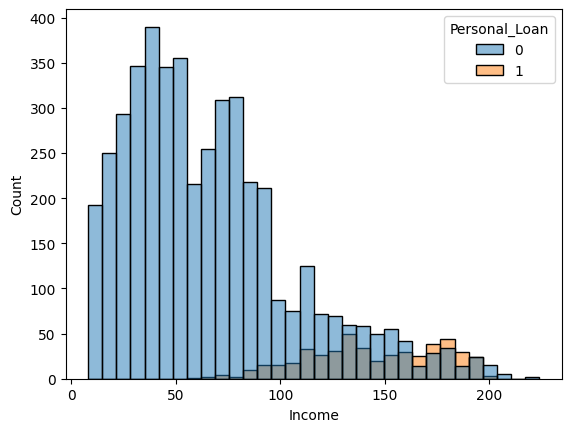

In [ ]:
sns.histplot(df, x= 'Income', hue = 'Personal_Loan');

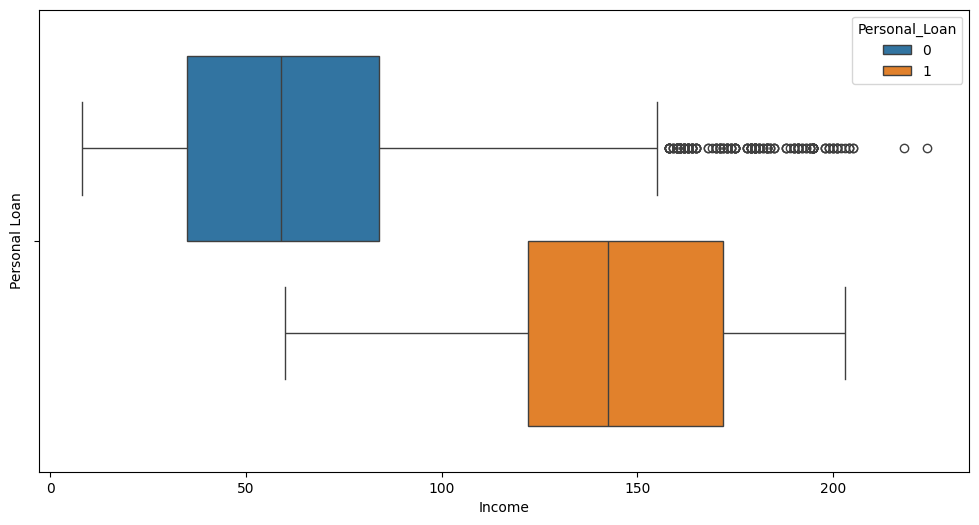

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(df, x= 'Income', hue = 'Personal_Loan')
plt.xlabel('Income')
plt.ylabel('Personal Loan');

In [ ]:
df.groupby('Personal_Loan')['Income'].mean()

Personal_Loan
0     66.237389
1    144.745833
Name: Income, dtype: float64

In [ ]:
df.groupby('Personal_Loan')['Income'].median()

Personal_Loan
0     59.0
1    142.5
Name: Income, dtype: float64

*   We can see that customers who purchase a loan, have greater incomes vs customers who don't. Approximately, more than double.
*   There are no outliers on the income of customers who purchase the loan.


##**Relation between cc avg and personal loan**

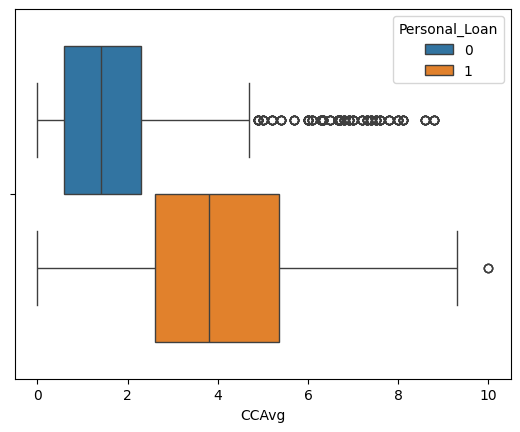

In [ ]:
sns.boxplot(df, x= 'CCAvg', hue = 'Personal_Loan');

In [ ]:
df.groupby('Personal_Loan')['CCAvg'].mean()

Personal_Loan
0    1.729009
1    3.905354
Name: CCAvg, dtype: float64

*   Customers who purchase a loan have a greater credit card debt.
*   There's an outlier on customers who purchase the loan.

##**Relation between cc avg, income and personal loan**

<Figure size 1200x600 with 0 Axes>

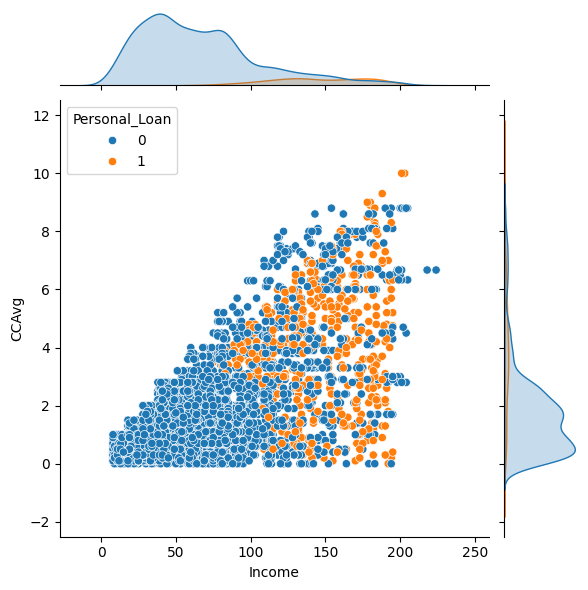

In [ ]:
plt.figure(figsize=(12, 6))
sns.jointplot(df, x= 'Income', y = 'CCAvg', hue= 'Personal_Loan')
plt.xlabel('Income')
plt.ylabel('CCAvg');

*   Both variables have a positive slope.
*   Combining the three variables, we can see that customers who purchase the loan, are in the higher strats of the combination of both variables.




This is the **first conclusion**: customers who purchase loans, have higher income, but also have higher cc debt. It could be deduced that they are using the loan for cancel their debt.

##**Education reached by customers who purchase a personal loan**

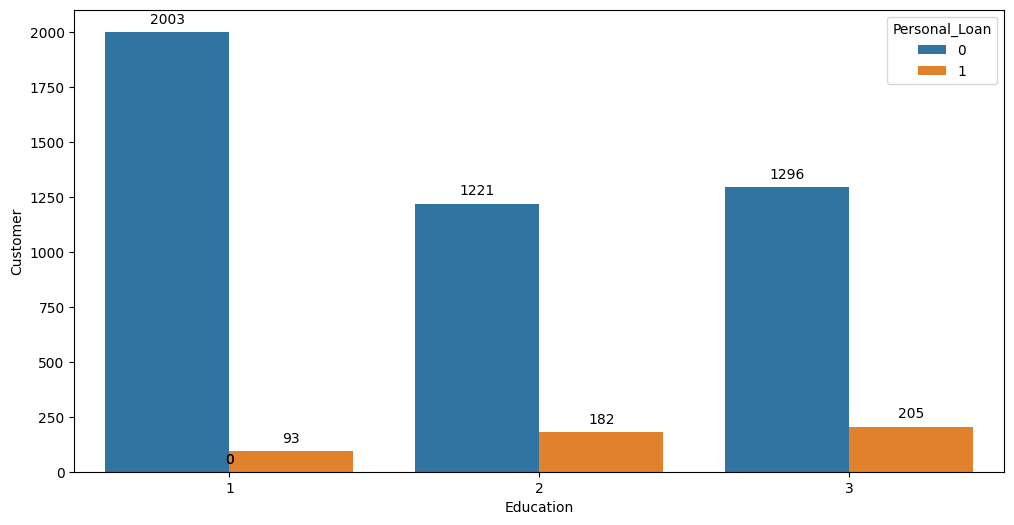

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(df, x='Education', hue= 'Personal_Loan')
plt.xlabel('Education')
plt.ylabel('Customer')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')



*   Customers who reached higher levels of educations are the ones with most loans purchased.



In [ ]:
(df.groupby(['Education', 'Personal_Loan']).size() / df.groupby('Education').size()).unstack()*100

Personal_Loan          0          1
Education                          
1              95.562977   4.437023
2              87.027798  12.972202
3              86.342438  13.657562



*   Also in proportion, higher educated customers are the ones with most loans purchased.




##**Now let's see the combination of income, education and personal loan purchasers**

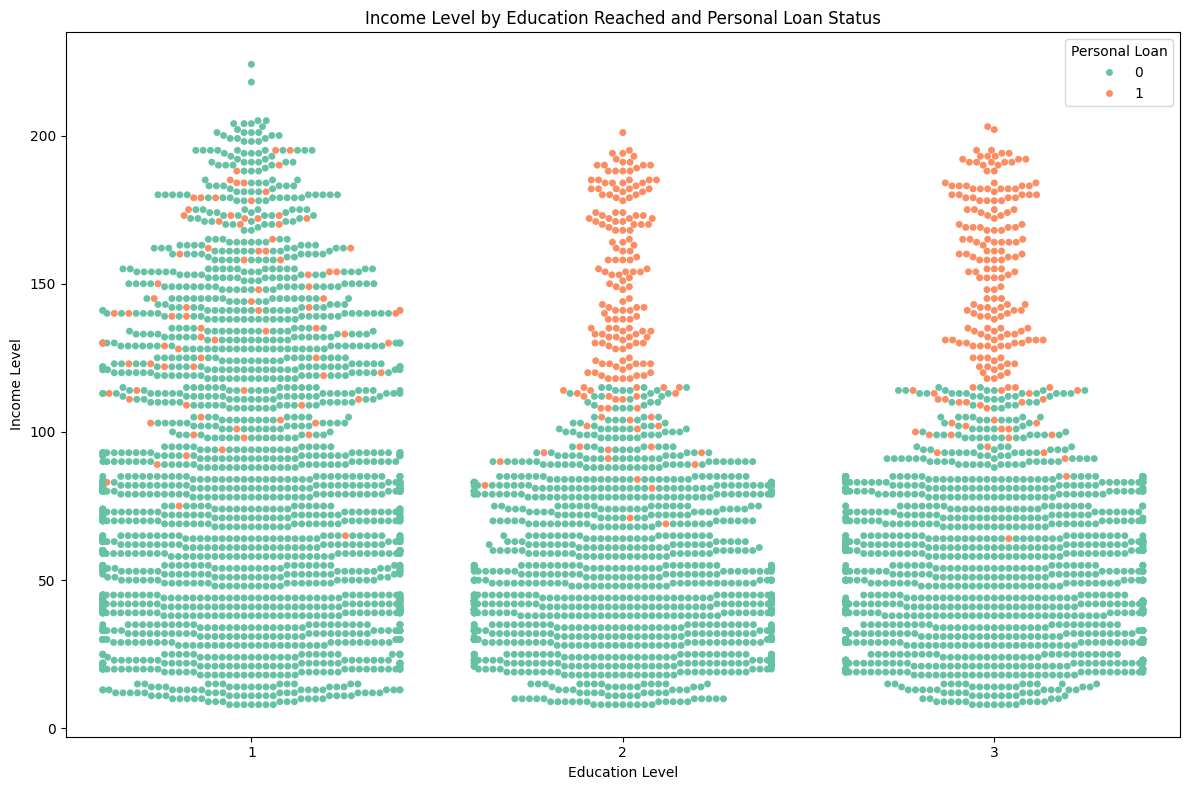

In [ ]:
plt.figure(figsize=(12, 8))
sns.swarmplot(data=df, x='Education', y='Income', hue='Personal_Loan', palette='Set2')
plt.xlabel('Education Level')
plt.ylabel('Income Level')
plt.title('Income Level by Education Reached and Personal Loan Status')
plt.legend(title='Personal Loan', loc='upper right')
plt.tight_layout()
plt.show();

*   Now, we can see that there are clients who have equally high incomes at each educational level, but those who are graduate or professionals are the ones who have loans.



*   **Second conclusion**: it appears that more educated customers, have purchased loans versus the ones who are undegraduated (1).



##**Age of the customers who purchased the loan**

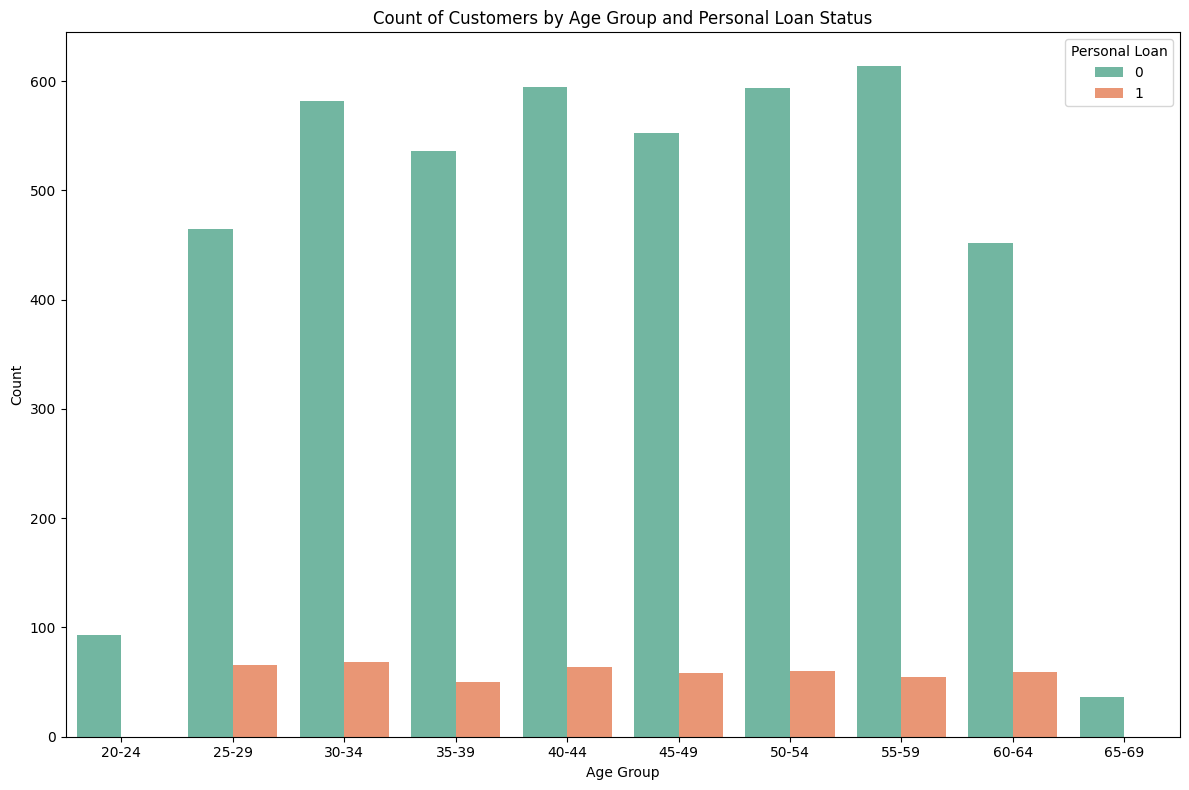

In [ ]:
age_bins = range(20, 71, 5)
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=[f'{i}-{i+4}' for i in range(20, 70, 5)])
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Age_Group', hue='Personal_Loan', palette='Set2')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Customers by Age Group and Personal Loan Status')
plt.legend(title='Personal Loan', loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
df.groupby(['Age_Group', 'Personal_Loan']).size().unstack()

Personal_Loan    0   1
Age_Group             
20-24           93   0
25-29          465  66
30-34          582  68
35-39          536  50
40-44          595  64
45-49          553  58
50-54          594  60
55-59          614  55
60-64          452  59
65-69           36   0



*   In the head and the tails there are no loan purchasers.
*   In almost every group are the same quantity of customers with loans.



In [ ]:
(df.groupby(['Age_Group', 'Personal_Loan']).size() / df.groupby('Age_Group').size()).unstack()*100

Personal_Loan           0          1
Age_Group                           
20-24          100.000000   0.000000
25-29           87.570621  12.429379
30-34           89.538462  10.461538
35-39           91.467577   8.532423
40-44           90.288316   9.711684
45-49           90.507365   9.492635
50-54           90.825688   9.174312
55-59           91.778774   8.221226
60-64           88.454012  11.545988
65-69          100.000000   0.000000

*   In terms of percentage also ranges between 8% and 12%. There is not outlier group.

In [ ]:
df.drop(["Age_Group"], axis=1, inplace=True)

##**Customers who purchased the loan have mortgages?**

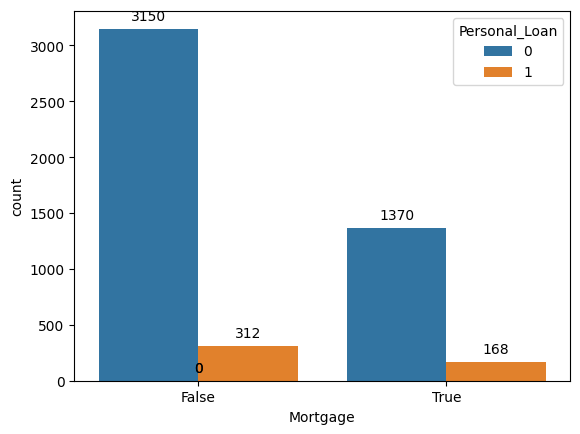

In [ ]:
sns.countplot(df, x= df['Mortgage']>0 , hue = 'Personal_Loan')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points');



*   11% of customers who have a mortgage, also have a loan.
*   9% of the customers who don't have mortgage have a loan.

It seems that this variable doesn't explain much.

##**How is family composition of customers who acquired loans?**

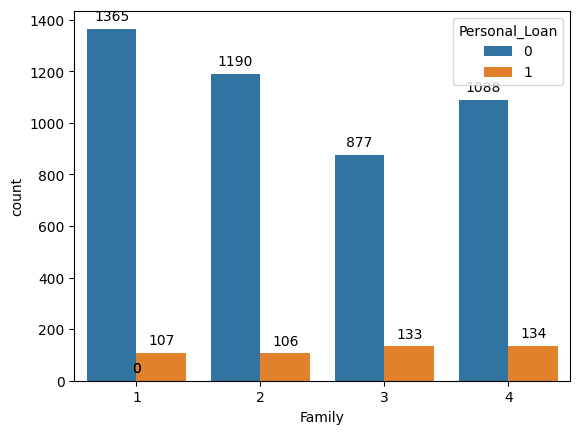

In [ ]:
sns.countplot(df, x= 'Family' , hue = 'Personal_Loan')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points');



*   On comparison, bigger composition families are willing to purchase loans (it could be related to having more expenses because of the kids, or, the need of buying expensive goods as a bigger car for example)



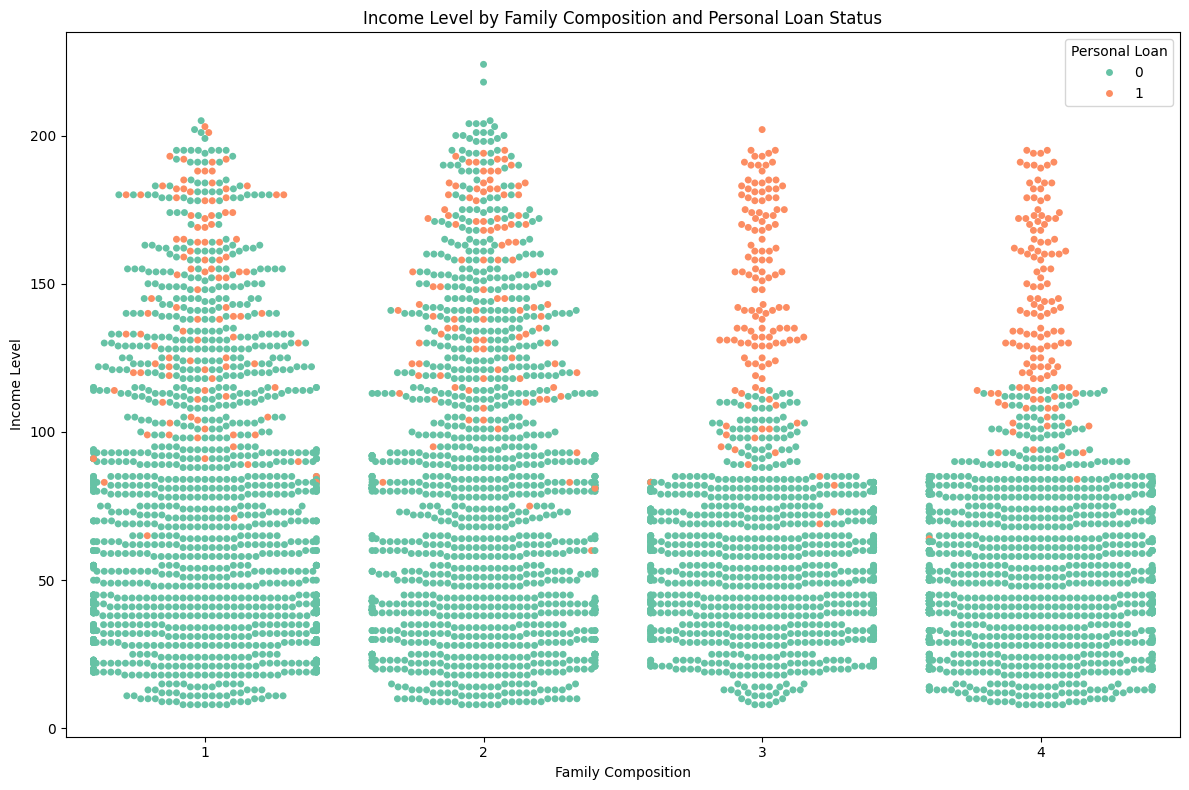

In [ ]:
plt.figure(figsize=(12, 8))
sns.swarmplot(data=df, x='Family', y='Income', hue='Personal_Loan', palette='Set2')
plt.xlabel('Family Composition')
plt.ylabel('Income Level')
plt.title('Income Level by Family Composition and Personal Loan Status')
plt.legend(title='Personal Loan', loc='upper right')
plt.tight_layout()
plt.show();

*   This graph is pretty similar to the one of the education.

**Third conclusion:** bigger families with higher incomes are prone to purchase the loan.

**Let's do a quick check on other variables**

In [ ]:
df.groupby('Personal_Loan').mean()

ID        Age  Experience      Income    Family  \
Personal_Loan                                                             
0              2512.165487  45.367257   20.165487   66.237389  2.373451   
1              2390.650000  45.066667   19.843750  144.745833  2.612500   

                  CCAvg  Education    Mortgage  Securities_Account  \
Personal_Loan                                                        
0              1.729009   1.843584   51.789381            0.102212   
1              3.905354   2.233333  100.845833            0.125000   

               CD_Account    Online  CreditCard  
Personal_Loan                                    
0                0.035841  0.595796    0.293584  
1                0.291667  0.606250    0.297917

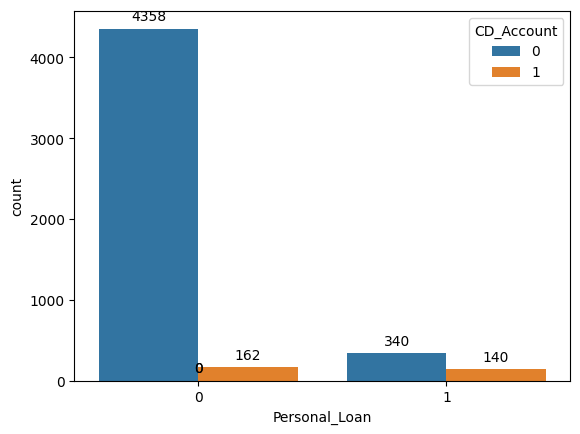

In [ ]:
sns.countplot(df, x='Personal_Loan', hue = 'CD_Account')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points');

On proportion, customers who purchase a loan, also have more certificate deposit accounts.

*   We reach some important conclusions on the different variables using the EDA. Now, let's pass to the model building to check if this is true.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)



*  There are no missing values in the data.
*  There's no necesity of taking out outliers, because tree decision models are not influenced by them.
*   We have all numerical values, so, there's no need to create dummy variables.
* Since all the values in ID column are unique we can drop it



In [ ]:
df.drop(["ID"], axis=1, inplace=True)

###We split the data

In [ ]:
X = df.drop(['Personal_Loan'], axis=1)
y = df['Personal_Loan']

**Creating training and test sets.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


## Model Building

### Model Evaluation Criterion

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.

In [ ]:
model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Model Building

### Model performance evaluation

### Model can make wrong predictions as:

1. Predicting a customer will not take the loan but in reality the customer would take it.

2. Predicting a customer will take the loan but in reality the customer will not take it.


### Which case is more important?

* If we predict a taker customer as a non-taker customer, bank would lose an opportunity of providing loan to a potential customer.

### How to reduce this loss i.e need to reduce False Negatives?
*  **Recall** should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The make_confusion_matrix function will be used to plot confusion matrix.

### Checking model performance on test set

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Checking model performance on training set

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

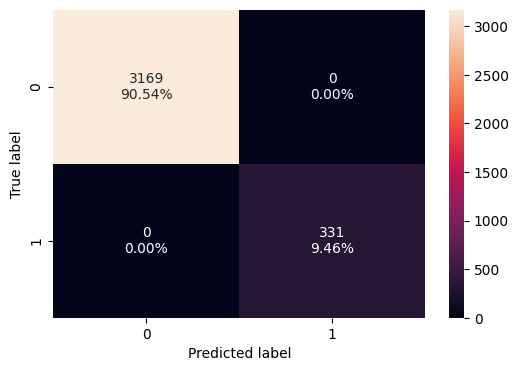

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)



*   In training, the model is perfect, there are no false negatives nor false positives.
*   Model is overfitted.



### Checking model performance on test set

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0      0.98  0.885906   0.910345  0.897959

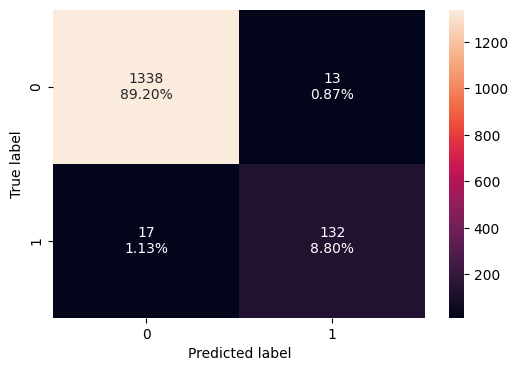

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

* Model is giving good and generalized results on training and test set.

### Visualizing the Decision Tree

In [ ]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


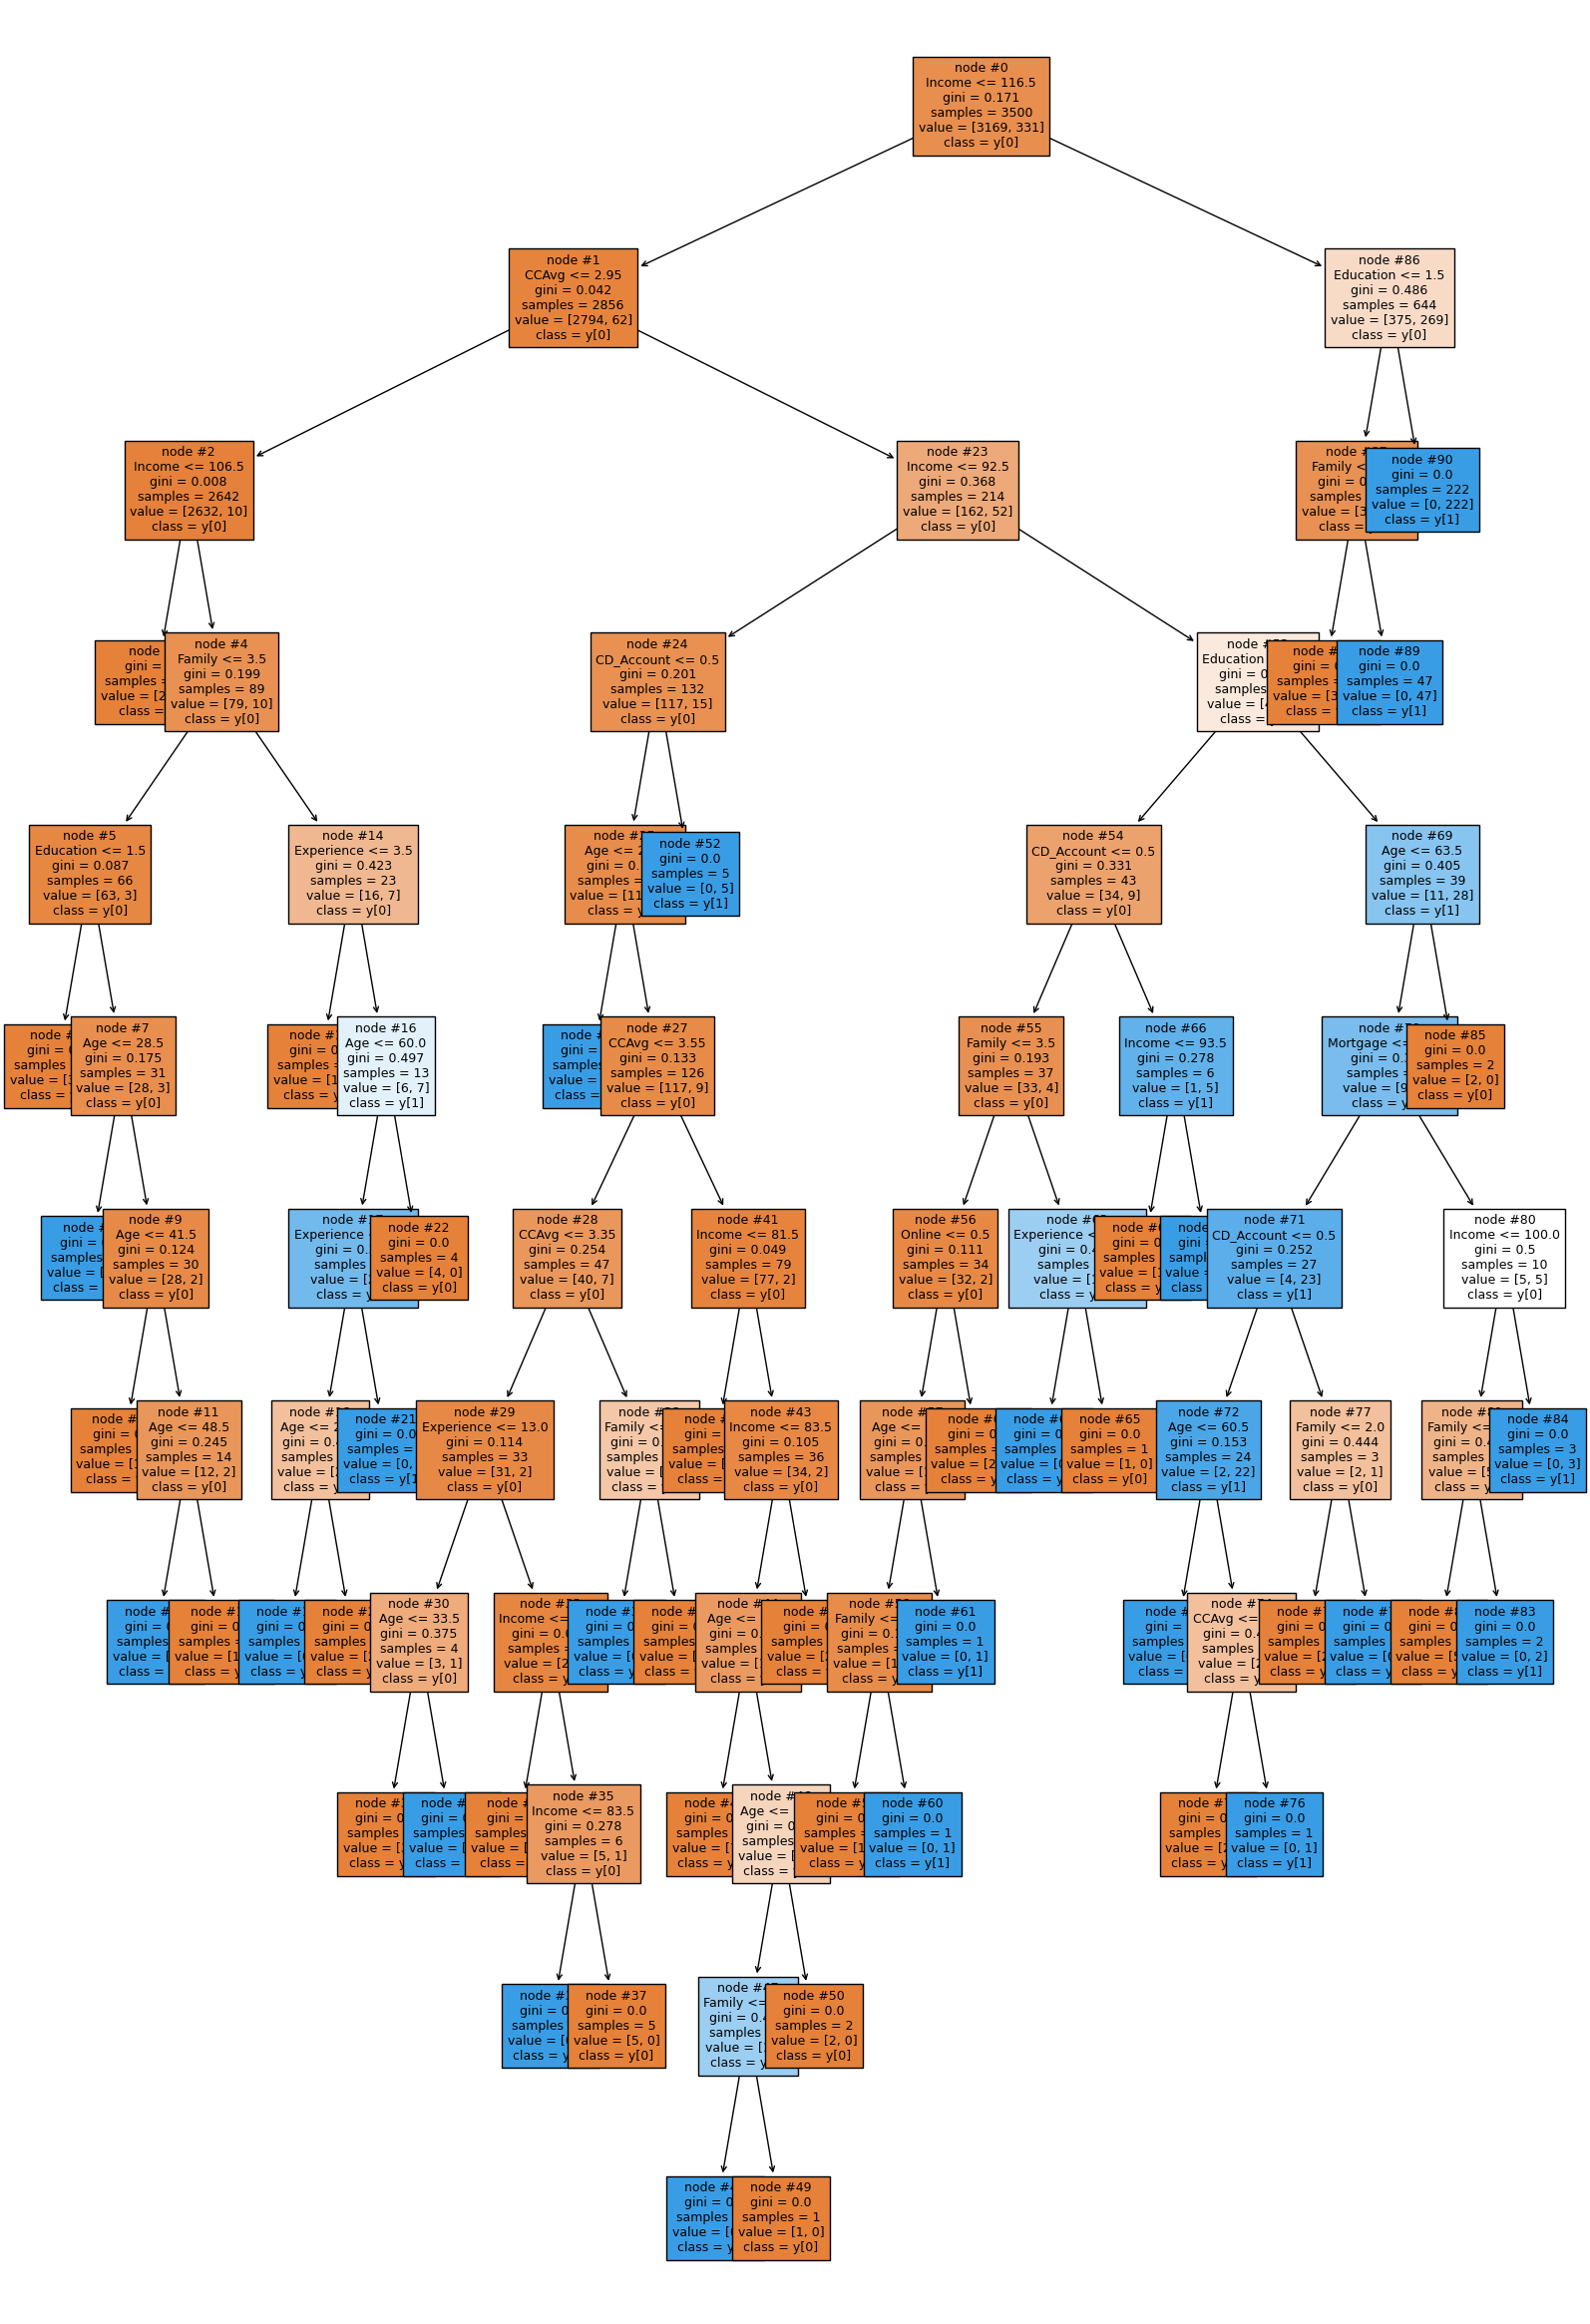

In [ ]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [35.00, 0.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Age <= 41.50
|   |   |   |   |   |   |   |--- weights: [16.00, 0.00] class: 0
|   |   |   |   |   |   |--- Age >  41.50
|   |   |   |   |   |   |   |--- Age <= 48.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |--- Age >  48.50
|   |   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |--- Experience > 

In [ ]:
print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.401465
Income              0.308336
Family              0.169593
CCAvg               0.044408
Age                 0.035708
CD_Account          0.025711
Experience          0.011203
Mortgage            0.003014
Online              0.000561
ZIPCode             0.000000
Securities_Account  0.000000
CreditCard          0.000000


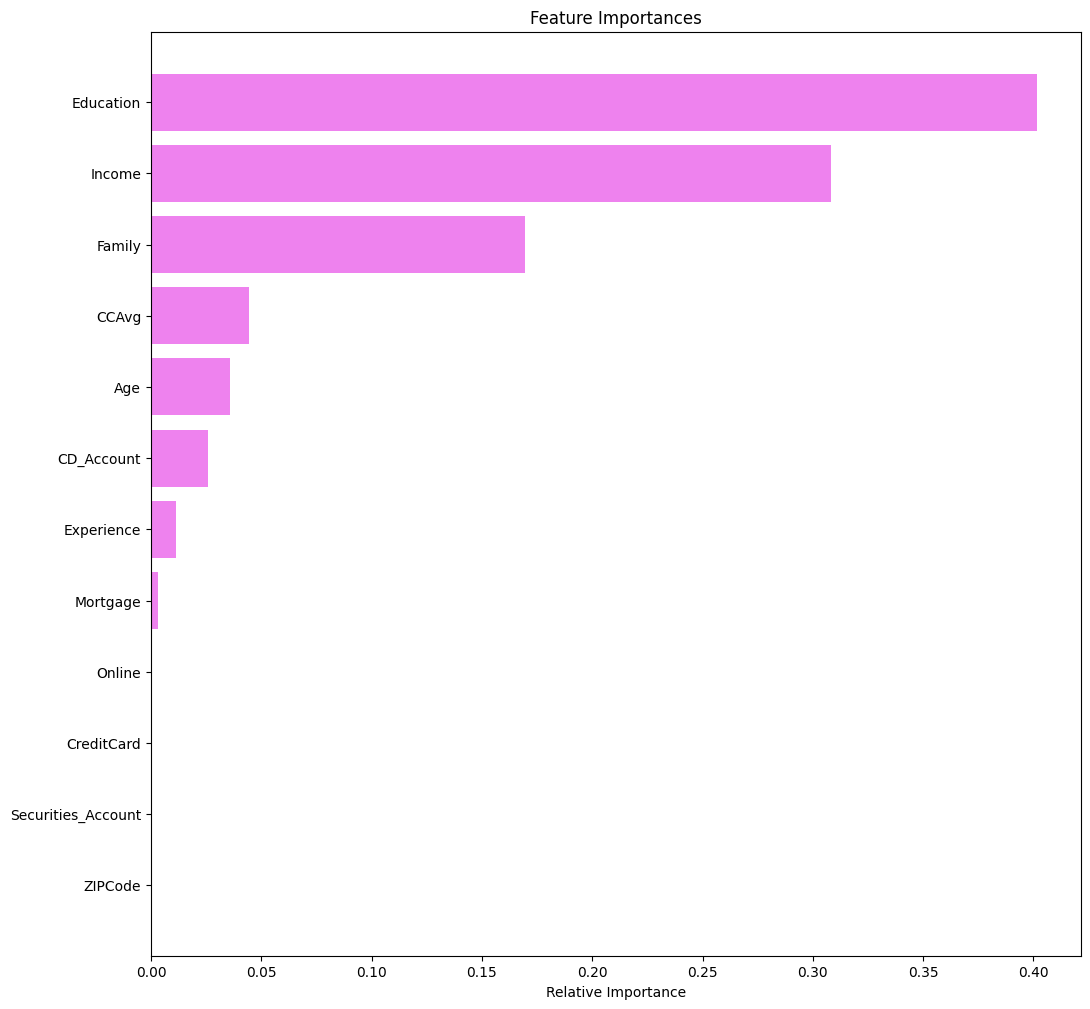

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Education, Income and Family are the top 3 important features.

### Model Performance Improvement

### I'm going to use GridSearch for Hyperparameter tuning of our tree model

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10),
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1,0.000001, 0.00001, 0.0001],
              "criterion": ["entropy", "gini"],
              "splitter": ["best", "random"],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

### Checking performance on training set

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.988571  0.912387   0.964856  0.937888

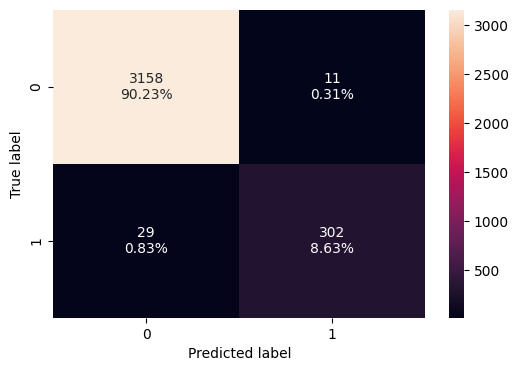

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

* The Recall has decreased on the training set as compared to the initial model. From 1 to ≈ 0.91, but this could be good if the test model recall increases.

### Checking model performance on test set

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0      0.98  0.852349   0.940741  0.894366

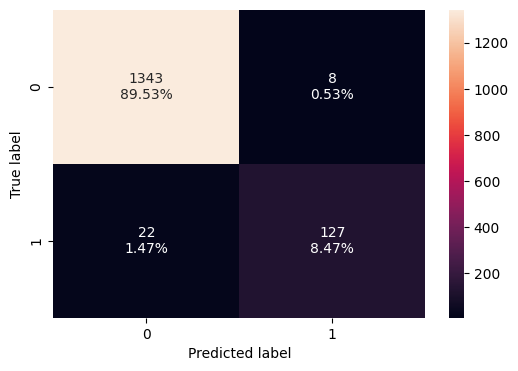

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

* After hyperparameter tuning the model has performance has **decreased**, recall have been downgraded from 0.885906 to 0.852349.

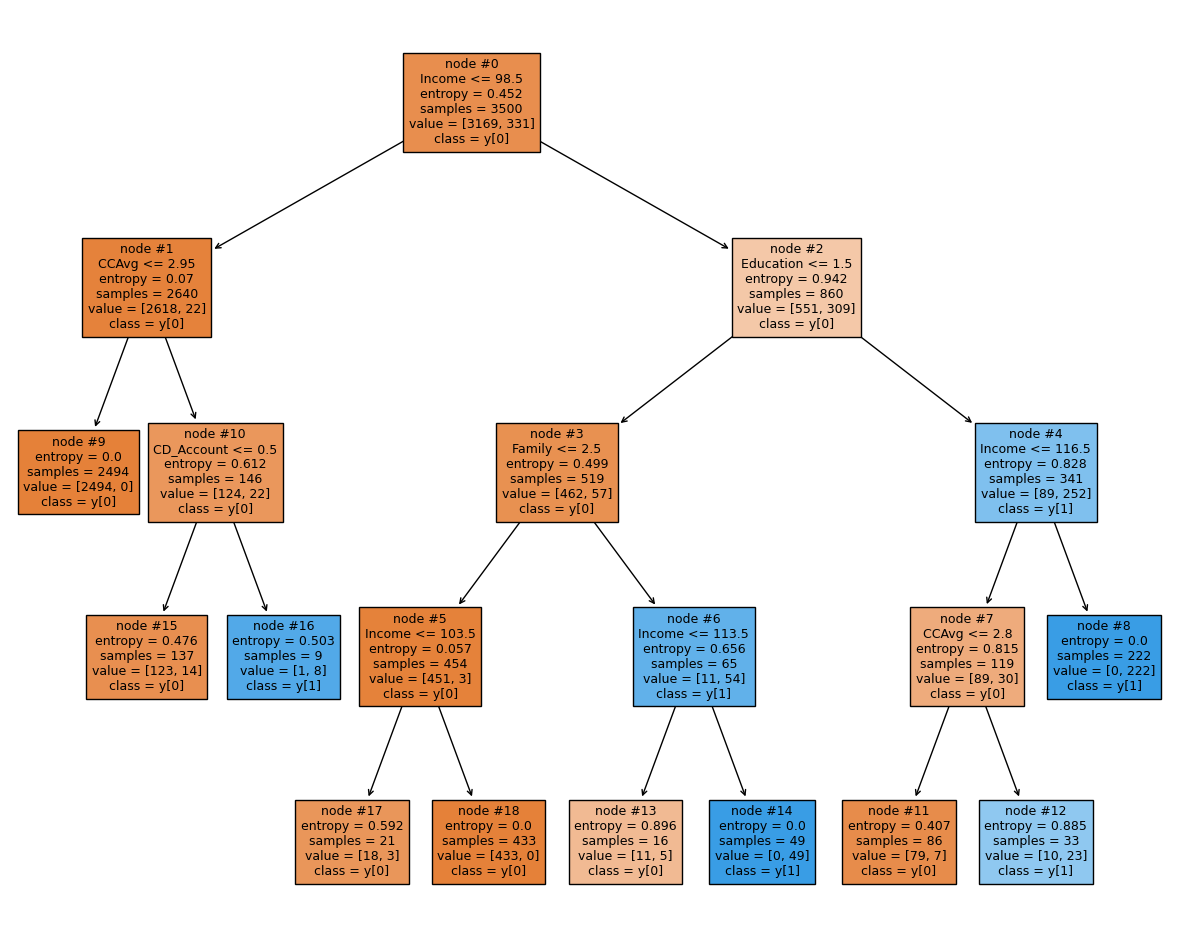

In [ ]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

* We are getting a simplified tree after pre-pruning, but it cost us perfomance on the model.

Now, we are going to try with post pruning, trying to avoid overfitting, check if we can improve model and making it less complex.

### Cost Complexity Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000223    0.001114
2     0.000268    0.002188
3     0.000359    0.003263
4     0.000381    0.003644
5     0.000381    0.004025
6     0.000381    0.004406
7     0.000381    0.004787
8     0.000409    0.006423
9     0.000476    0.006900
10    0.000508    0.007407
11    0.000582    0.007989
12    0.000593    0.009175
13    0.000641    0.011740
14    0.000769    0.014817
15    0.000792    0.017985
16    0.001552    0.019536
17    0.002333    0.021869
18    0.003024    0.024893
19    0.003294    0.028187
20    0.006473    0.034659
21    0.023866    0.058525
22    0.056365    0.171255

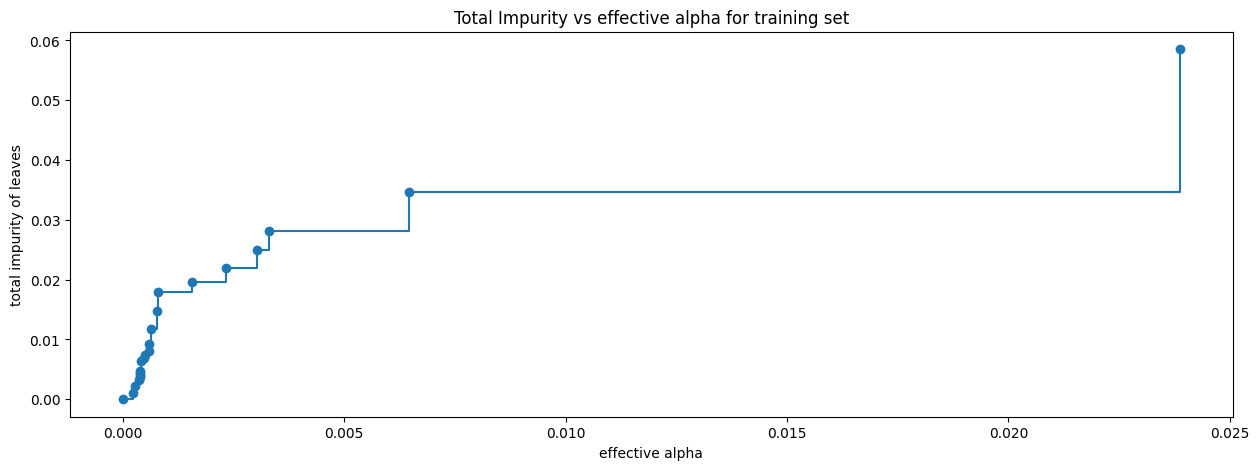

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

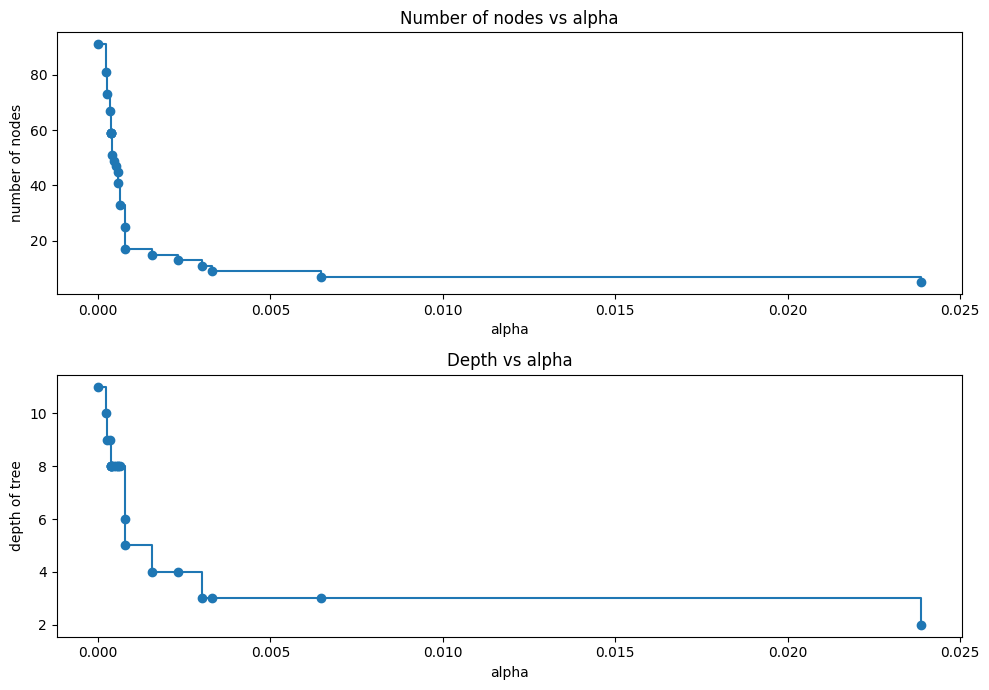

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Recall vs alpha for training and testing sets

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

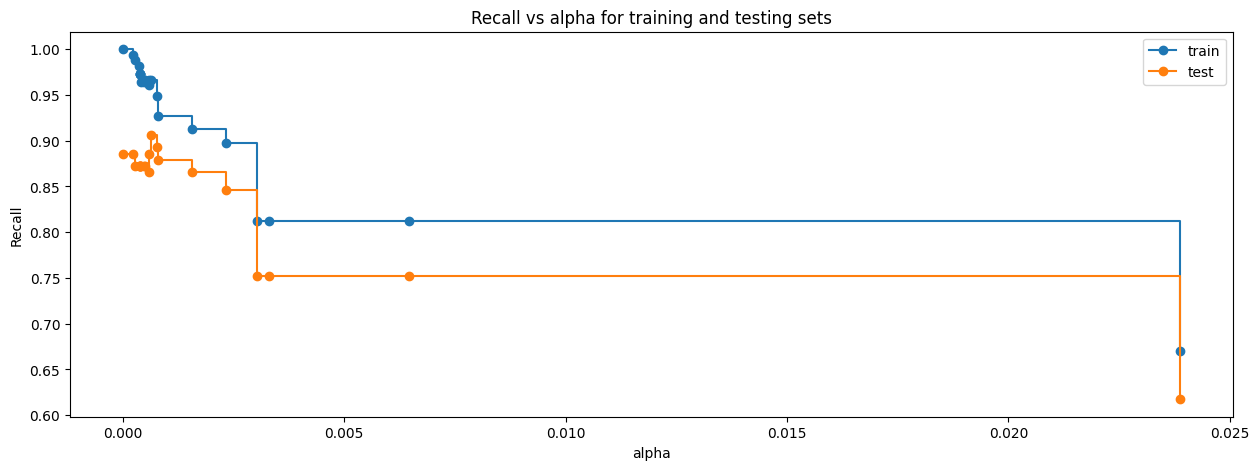

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)


### Checking model performance on training set

In [ ]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy    Recall  Precision        F1
0  0.992857  0.966767   0.958084  0.962406

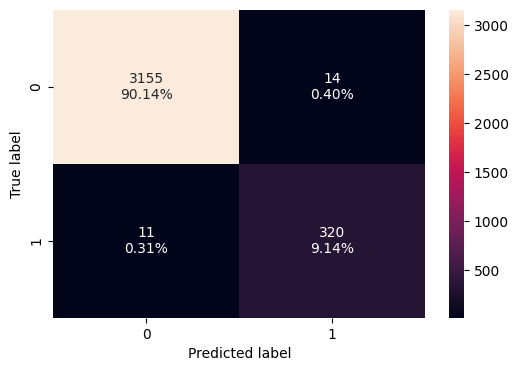

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)



*   Again the recall is lesser than the first model that we get, but a little better than pre-pruning model.
*   Let's check in test, model could start generalizing.



### Checking model performance on test set

In [ ]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy   Recall  Precision        F1
0     0.984  0.90604   0.931034  0.918367

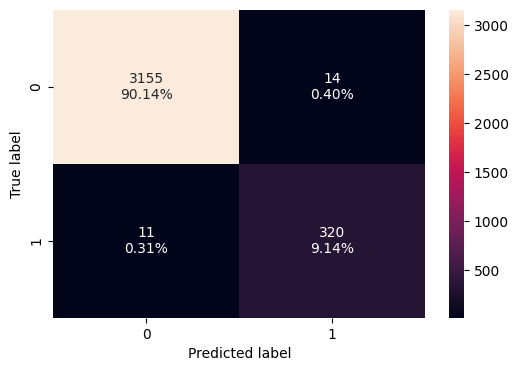

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

* With post-pruning we are getting good and generalized model performance on the test set.
* The **recall** has **improved** further. From 0.88 to 0.90
* The model became simpler, which will cost less computational effort to the Bank.

### Visualizing the Decision Tree

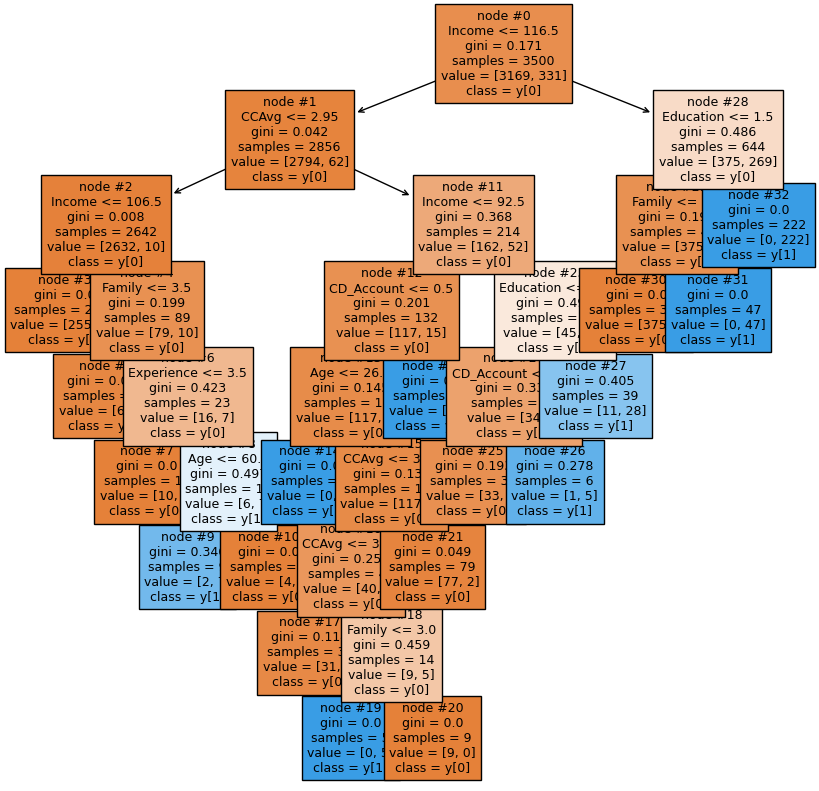

In [ ]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |--- Experience >  3.50
|   |   |   |   |   |--- Age <= 60.00
|   |   |   |   |   |   |--- weights: [2.00, 7.00] class: 1
|   |   |   |   |   |--- Age >  60.00
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |   |--- weights: [31.00, 2.00] class: 0
|   |   |   |   |   |   |--- CCAvg 

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Education           0.430462
Income              0.319735
Family              0.165225
CCAvg               0.045288
CD_Account          0.024353
Age                 0.009066
Experience          0.005871
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


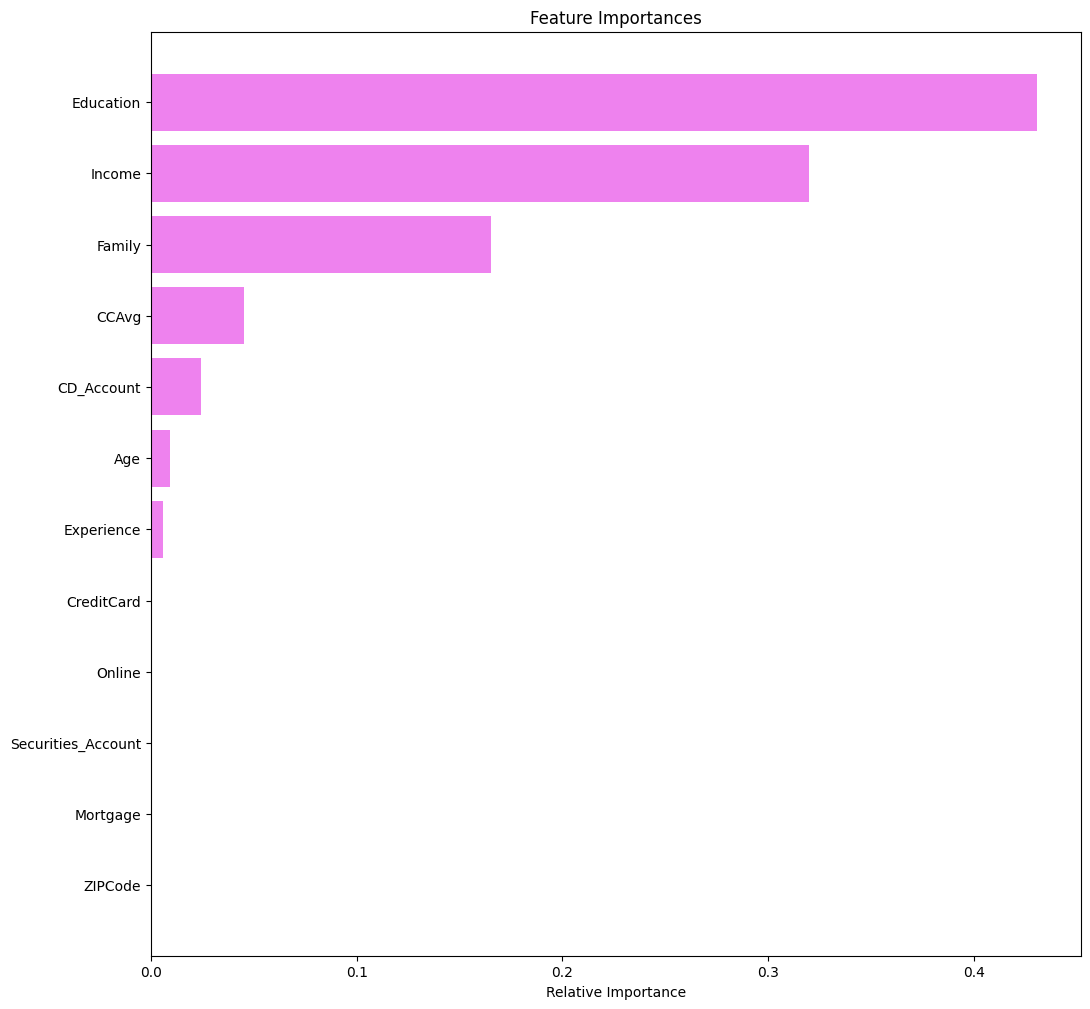

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Education, Income and Family remain the most important feature with post-pruning too, being Education 3% heavier.

## Model Comparison and Final Model Selection

####Training

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


Accuracy    Recall  Precision        F1
Decision Tree sklearn         1.000000  1.000000   1.000000  1.000000
Decision Tree (Pre-Pruning)   0.988571  0.912387   0.964856  0.937888
Decision Tree (Post-Pruning)  0.992857  0.966767   0.958084  0.962406



*   On training, the best model is the not pruned one, followed by the post-pruned model.



####Test

In [ ]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df.T

Test set performance comparison:


Accuracy    Recall  Precision        F1
Decision Tree sklearn            0.980  0.885906   0.910345  0.897959
Decision Tree (Pre-Pruning)      0.980  0.852349   0.940741  0.894366
Decision Tree (Post-Pruning)     0.984  0.906040   0.931034  0.918367

* Decision tree with post-pruning is giving the highest recall on the test set.
* The tree with post pruning is not complex and easy to interpret.
* We choose this model to recommend it to the Bank.

## Actionable Insights and Business Recommendations


* Education, income and family (in that order) are the most important variables in determining if a customer will purchase a loan or not.
* Customers with higher levels of education (2 or 3), +120 thousand of income and families of 3 or 4 persons, should be our principal targets.
* Customers with no education, even though some of them have high incomes, do not acquire loans, so we recommend to not bring attention to them.
* Customers with a higher credit card average debt, are also prone to purchase a loan.